<a href="https://colab.research.google.com/github/Sriram-764/Data-Warehousing-and-Data-Mining/blob/main/DWDM_Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the required libraries

import numpy as np
import pandas as pd

In [ ]:
# Loading the dataset

data = pd.read_csv('collegePlace.csv')

***Exploratory Data Analysis***


In [ ]:
# Knowing about the features of the dataset

data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


From the above information we can understand that the feature "PlacedOrNot" is the target field. Hence we can say that the dataset is the categorical data and the prediction should show whether a student is placed or not according to the given variables

In [ ]:
# Finding if there are any missing or null values

null_values = data.isnull().sum()
null_values

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

The dataset doesn't have any null values

In [ ]:
filled_values = data.fillna({'Hostel':data['Hostel'].mode()[0]})
filled_values

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


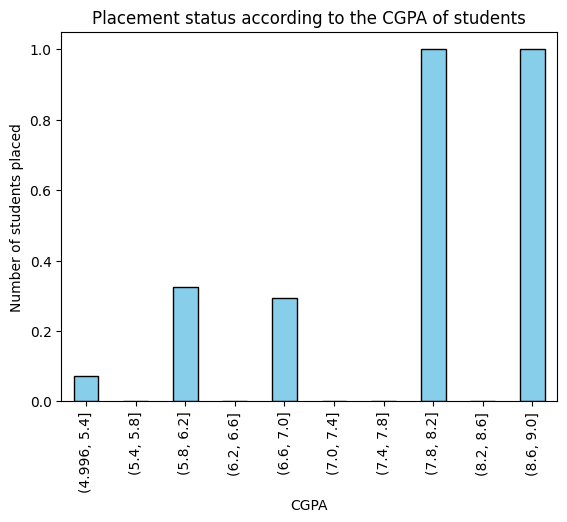

In [ ]:
# Finding relation between cgpa and placements

import matplotlib.pyplot as plt
import seaborn as sns

placed_students = data[data['PlacedOrNot'] == 1]

# Understanding the student placed data according to thier CGPA

# students grouped according to their CGPA
students_by_cgpa = data.groupby(pd.cut(data['CGPA'], bins = 10)).size()

# Finding the placed students according to their CGPA
placed_students_by_cgpa = placed_students.groupby(pd.cut(data['CGPA'], bins = 10)).size()

# Ratio of the placed and total students for each CGPA range
placed_student_ratio_by_cgpa_range = placed_students_by_cgpa / students_by_cgpa

placed_student_ratio_by_cgpa_range.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Placement status according to the CGPA of students')
plt.xlabel('CGPA')
plt.ylabel('Number of students placed')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The above graph gives picture calrity that the students who got more CGPA got placed more.Hence we can say that the student CGPA's are much related to the target feature which is one of the important observation

**Finding the dependent  and independent variables**

We can certainly believe that "PlacedOrNot is the target feature. So we can say that this feature is the
dependent variable and the other features are independent"


In [ ]:
dependent_variable = 'PlacedOrNot'

# Independent variables (features/predictors)
independent_variables = data.drop(columns=[dependent_variable]).columns.tolist()

print("Dependent Variable:")
print(dependent_variable)

print("\nIndependent Variables:")
print(independent_variables)

Dependent Variable:
PlacedOrNot

Independent Variables:
['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']
